# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [10]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import core.plotting.normality as cplonorm
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-8eb57583-63dc-429f-99b1-e42ae11cc4a6.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask455_Unit_test_plot_qq_from_core_plotting_normality'
  hash='292cad426'
  # Last commits:
    * 292cad426 LibertasSpZ SorrTask518_Add_mocking_to_isolate_the_deps_for_ck_dev_servers (#524) (   4 hours ago) Wed Aug 9 00:42:21 2023  (HEAD -> SorrTask455_Unit_test_plot_qq_from_core_plotting_normality, origin/master, origin/HEAD, master)
    * aafc30663 LibertasSpZ SorrTask501_Fix_each_cause_of_issues_when_running_regressi

# Plots

## `plot_histograms_and_lagged_scatterplot()`

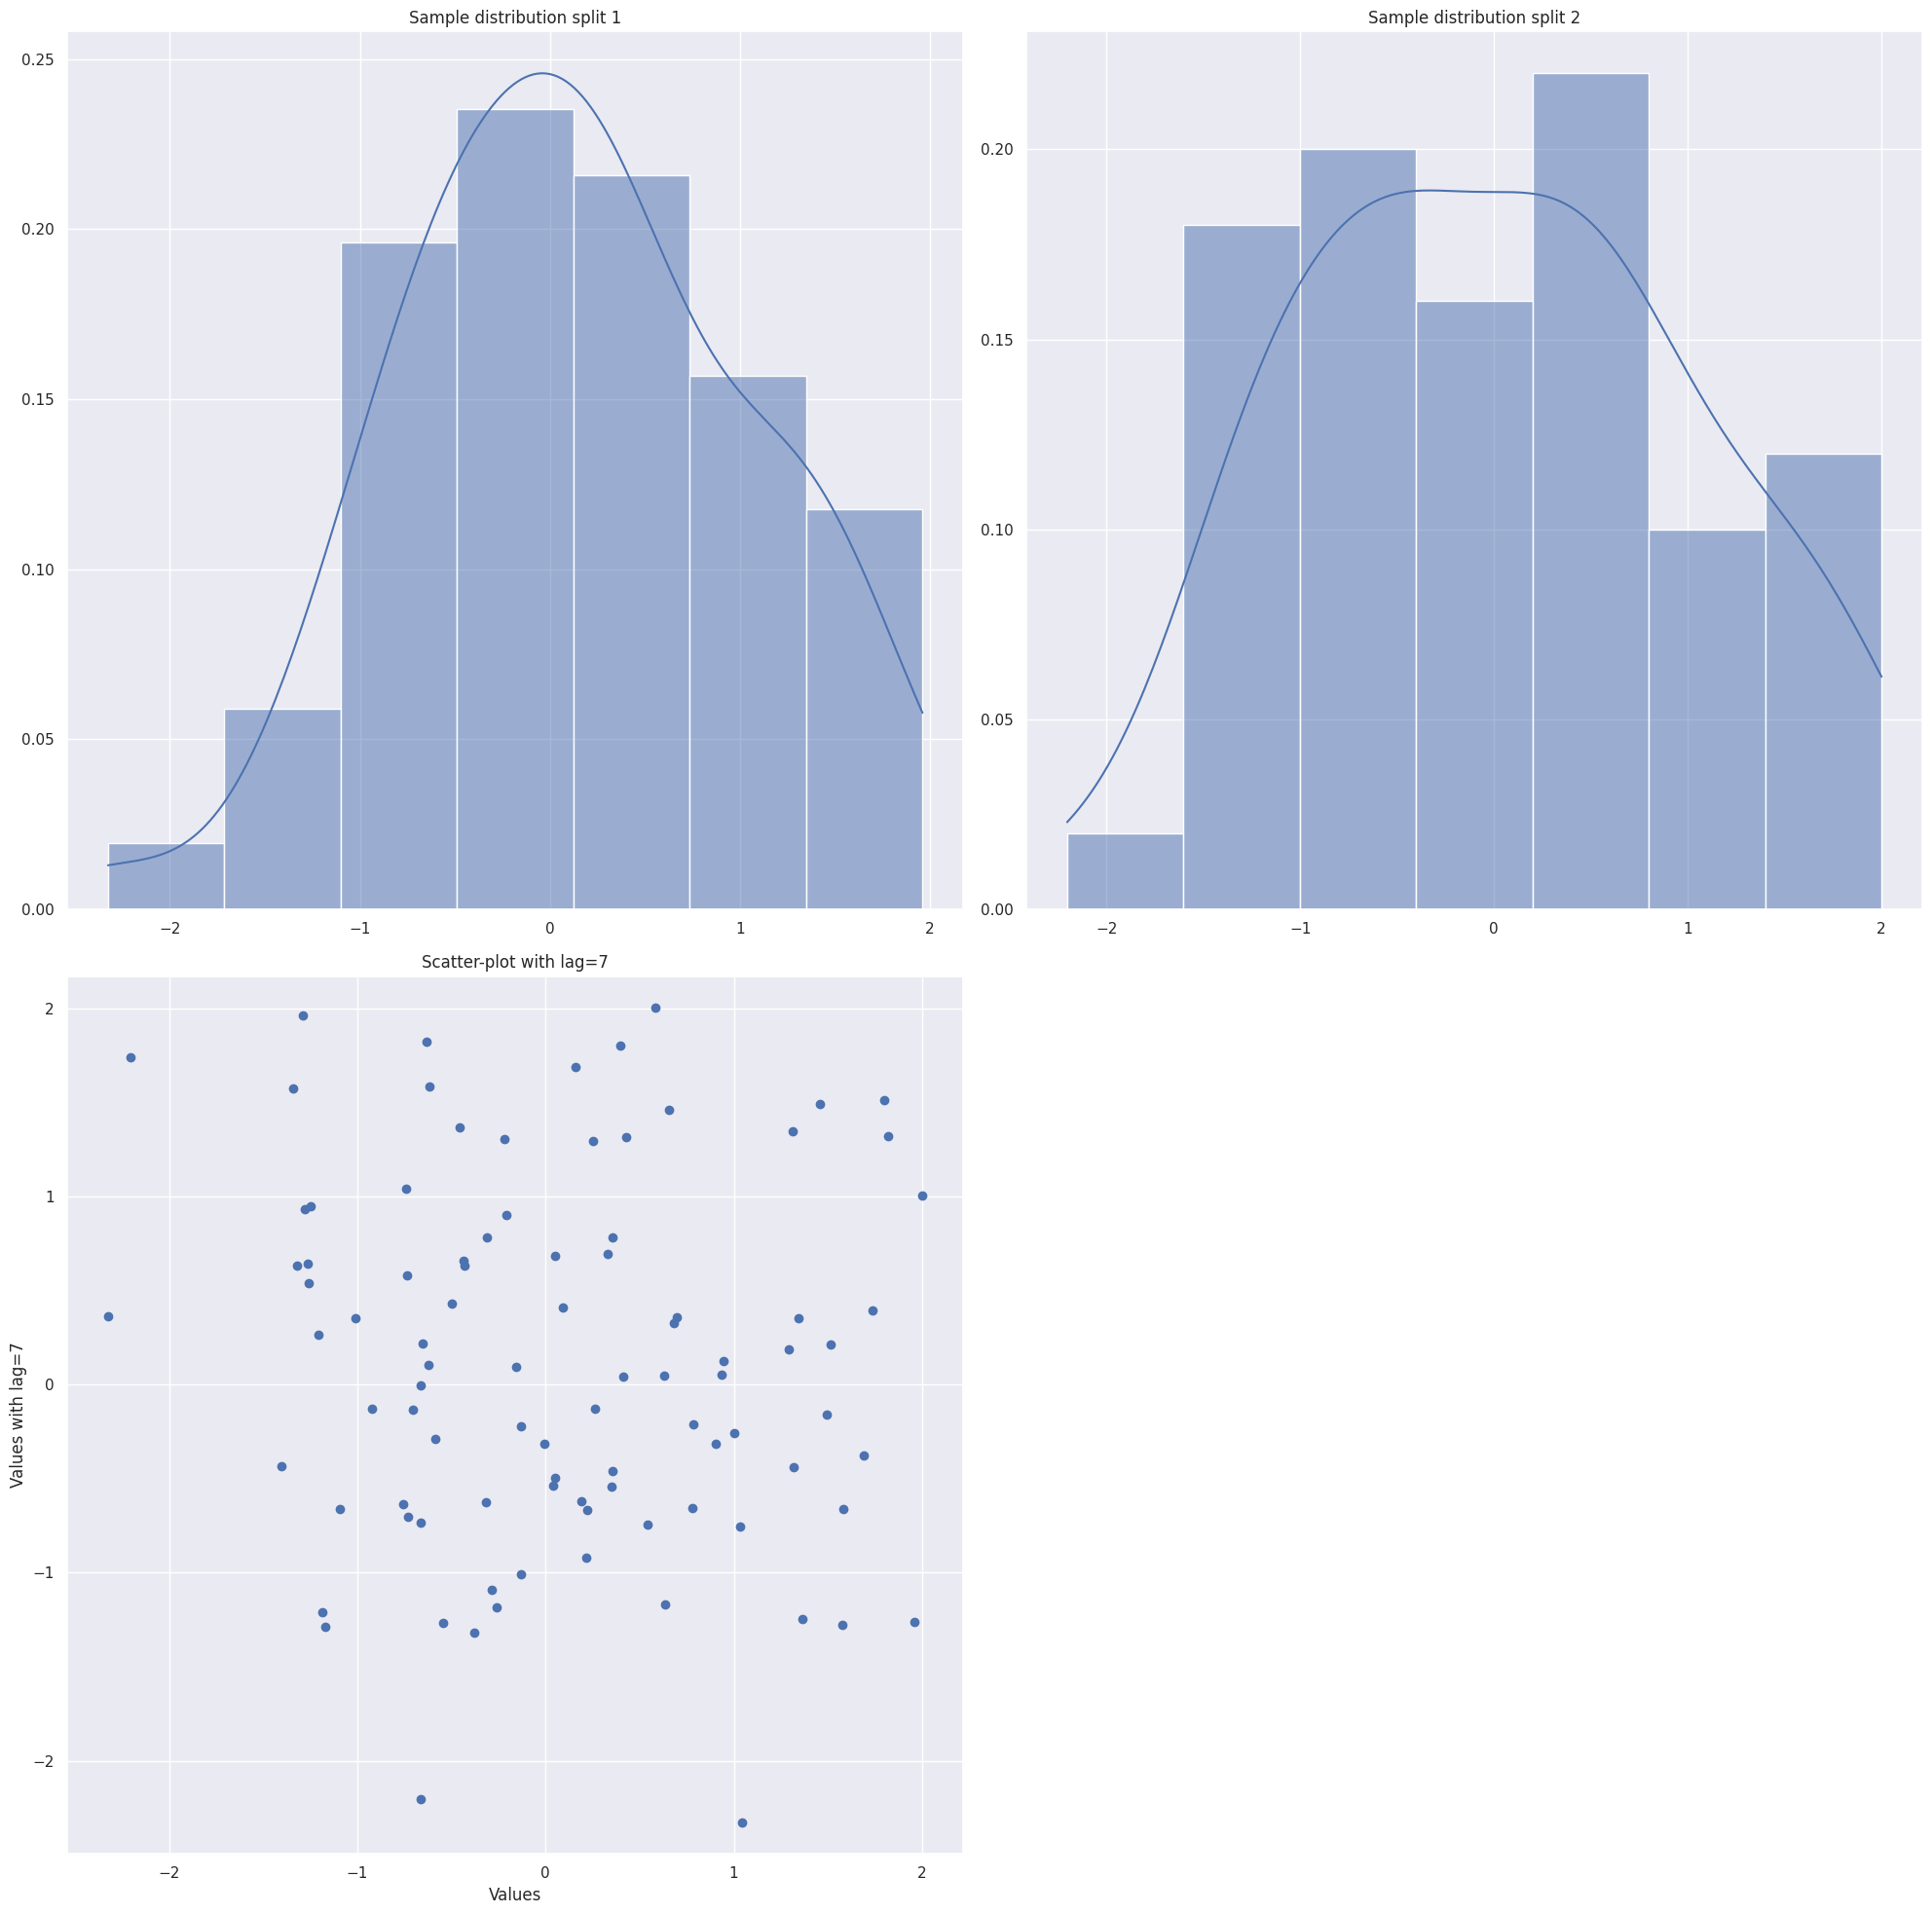

In [4]:
# Set inputs.
srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7
# TODO(Dan): Remove after integration with `cmamp`. Changes from Cm #4722 are not in `sorrentum` yet.
figsize = (20, 20)
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_timeseries_distribution()`

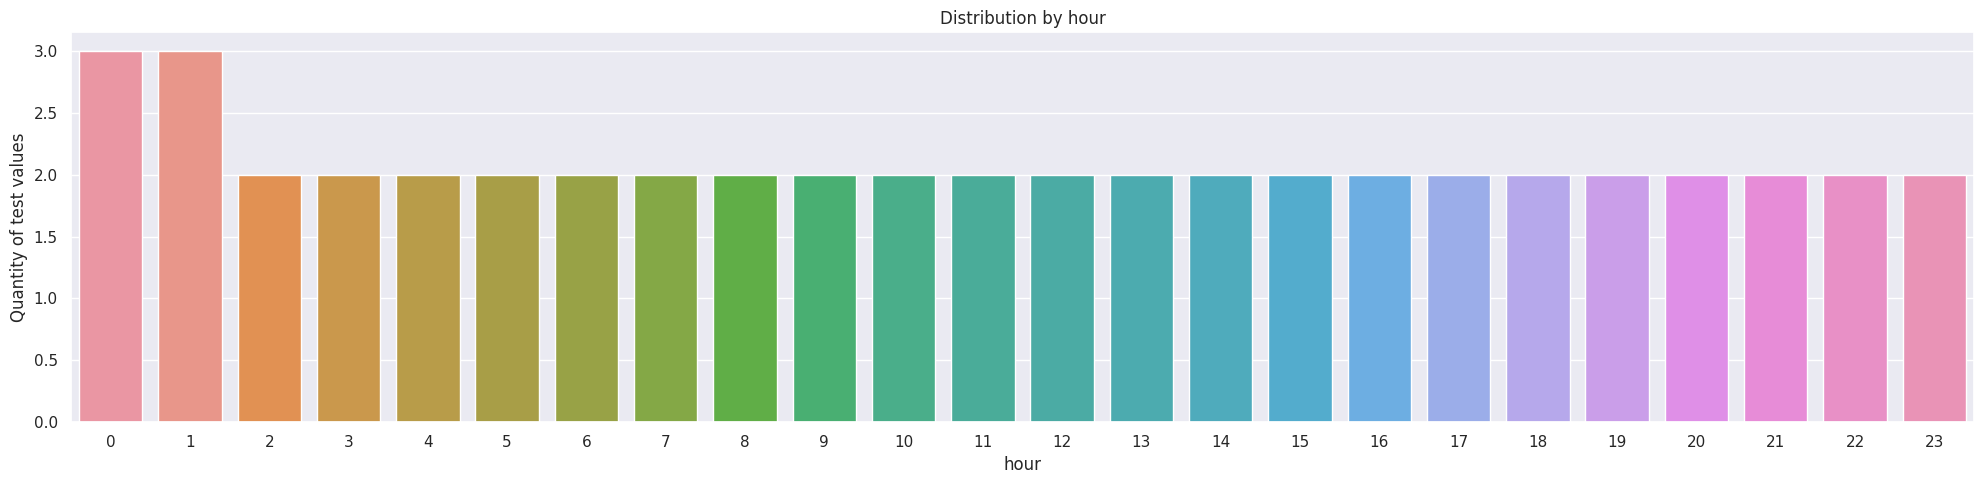

In [5]:
# Set inputs for hour interval.
cptetepl.Test_plots.setUpClass()
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

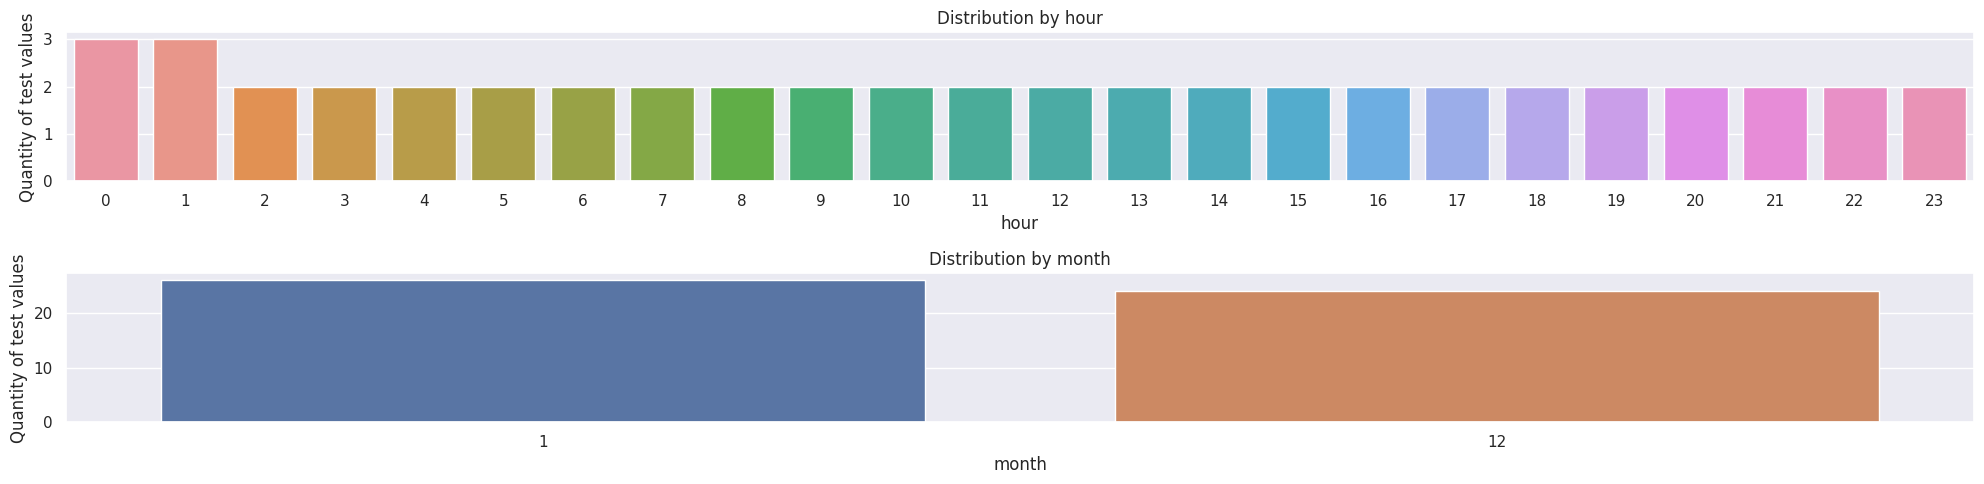

In [6]:
# Set input for hour and month interval.
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

## `plot_time_series_by_period()`

In [7]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

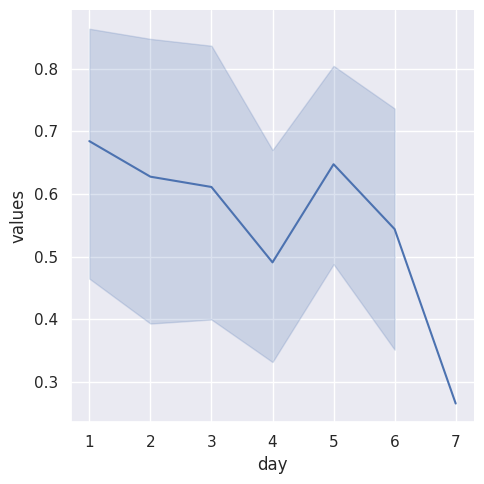

In [8]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

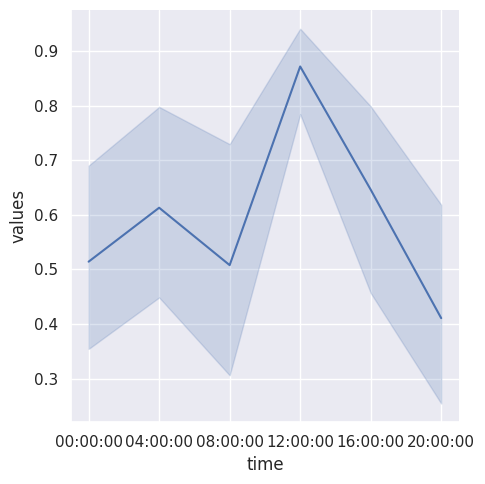

In [9]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)

## `plot_heatmap()`

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


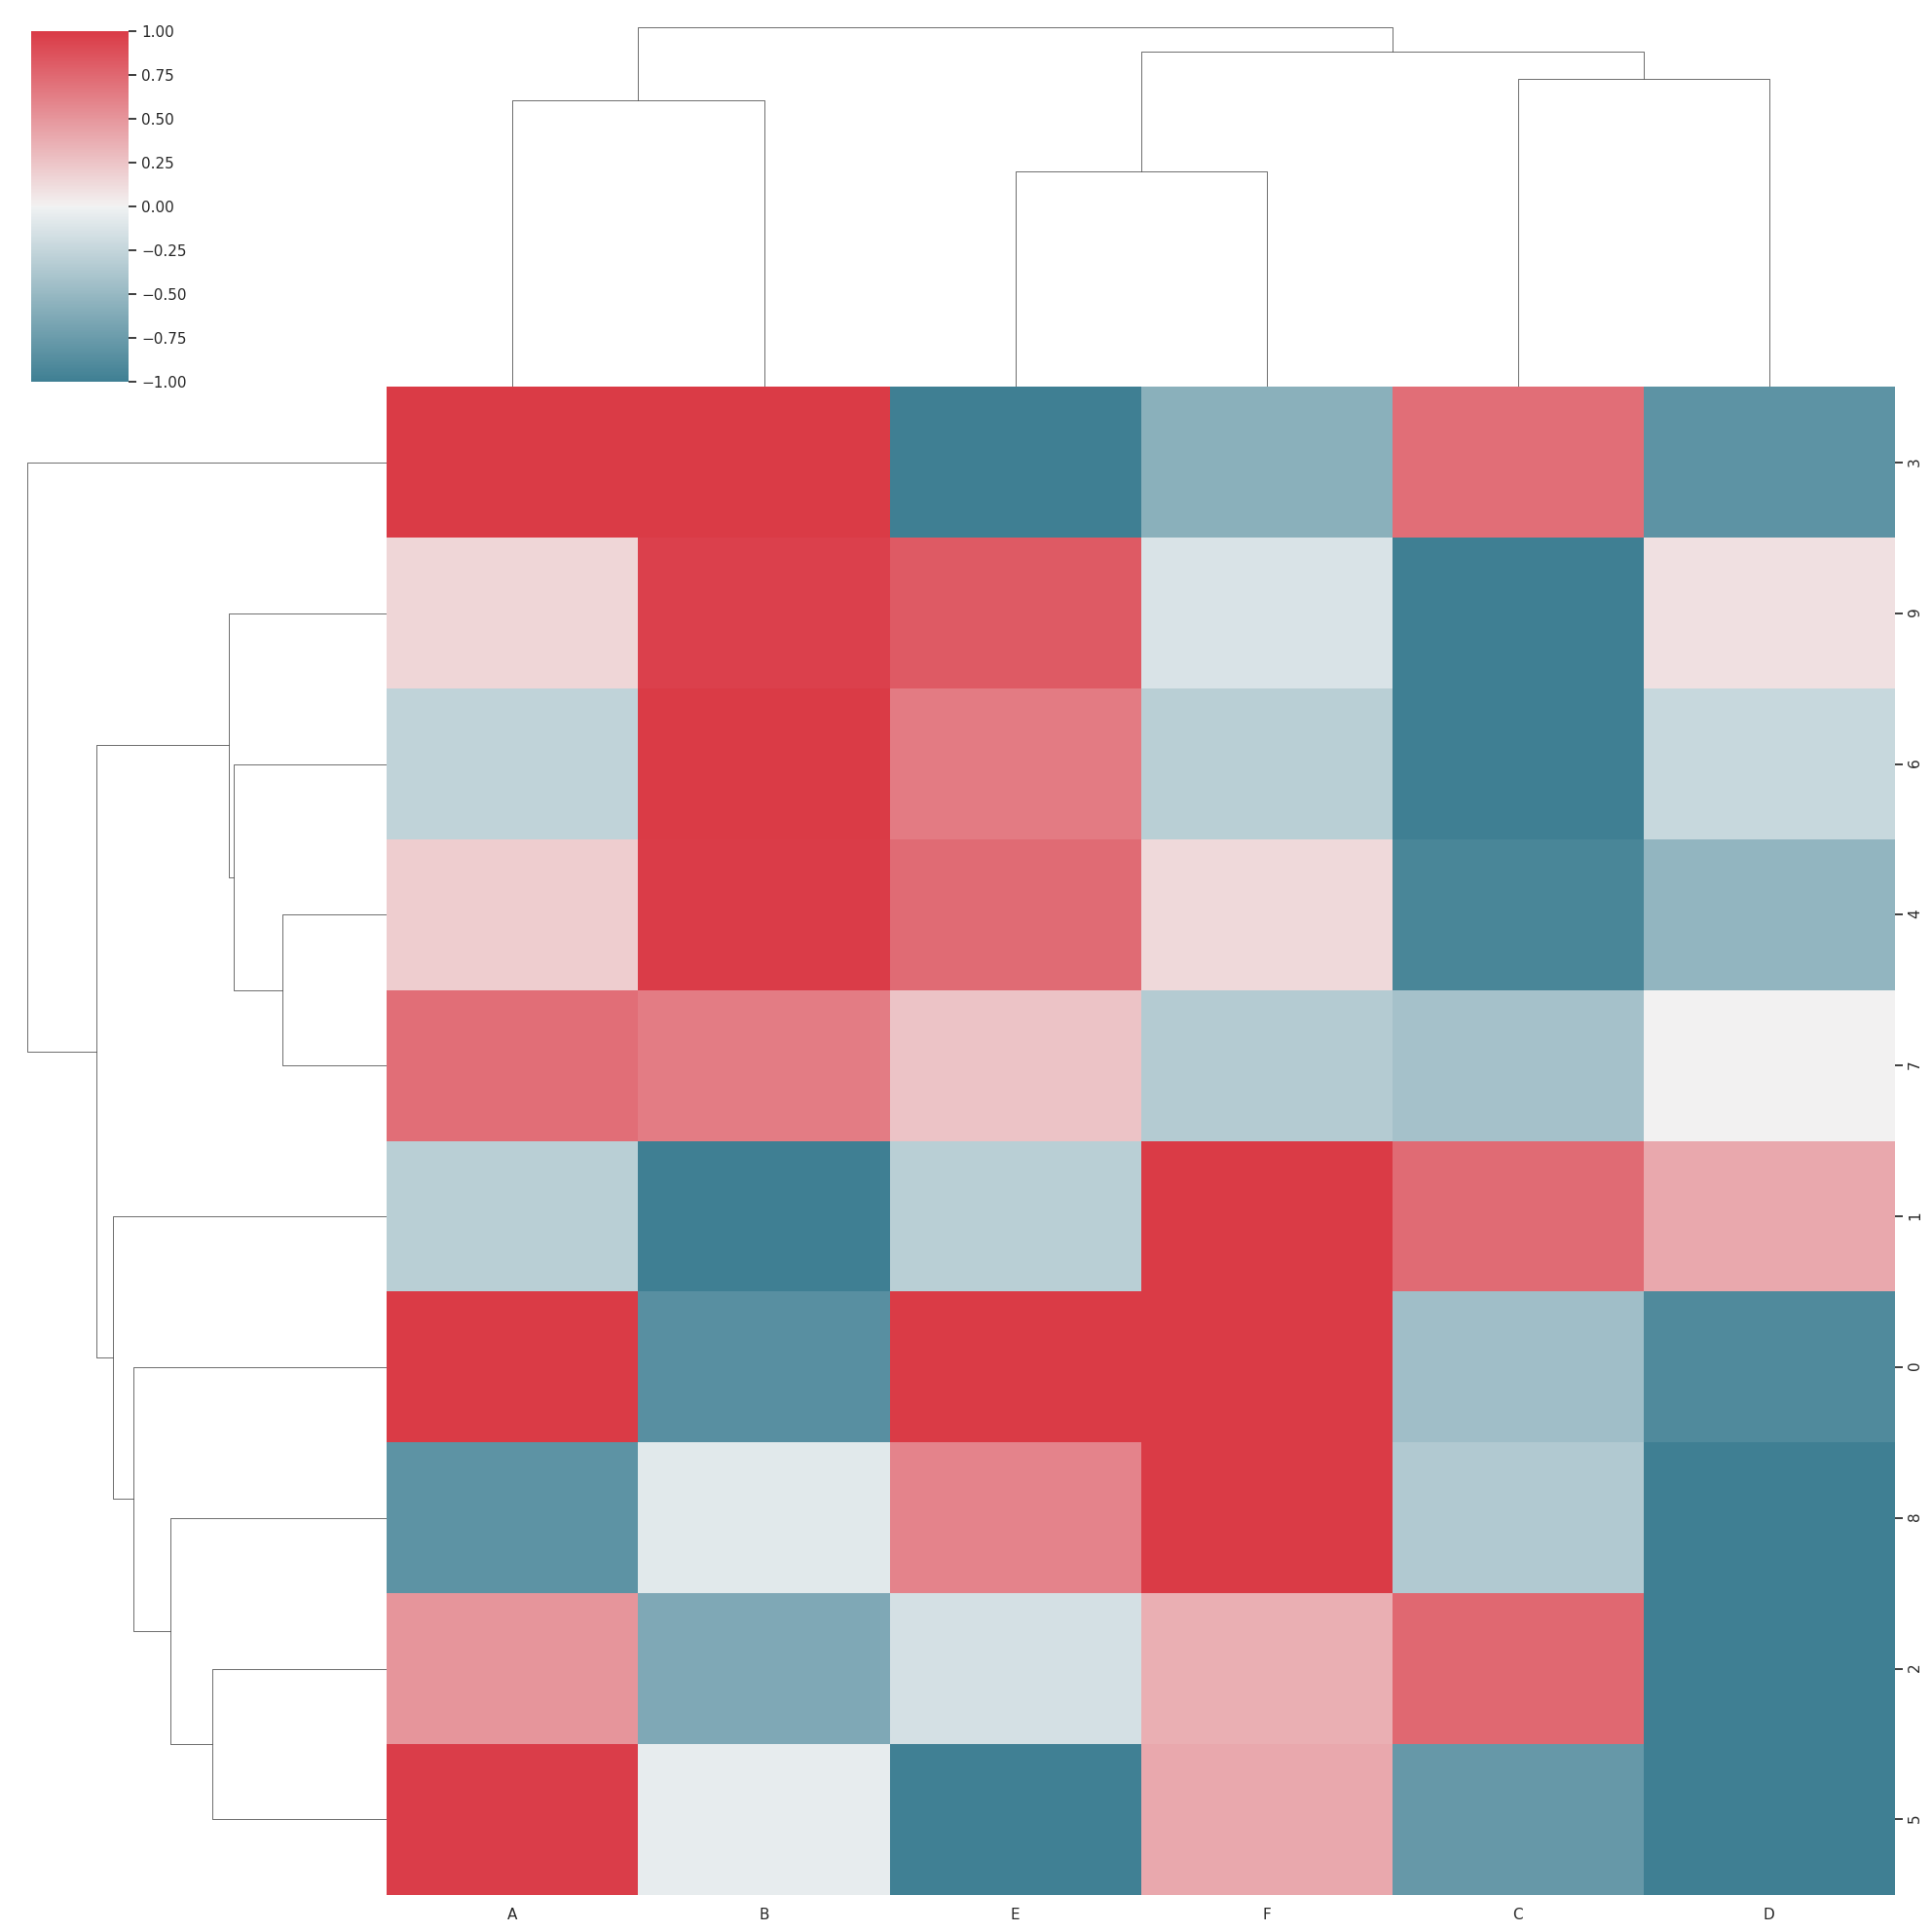

In [10]:
mode = "clustermap"
corr_df = cptetepl.Test_plots.get_plot_heatmap1()
figsize = (20, 20)
cplocorr.plot_heatmap(corr_df, mode, figsize=figsize)

## `plot_rets_signal_analysis()`

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.643GB vms=3.124GB mem_pct=17%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.645GB vms=3.125GB mem_pct=17%


/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


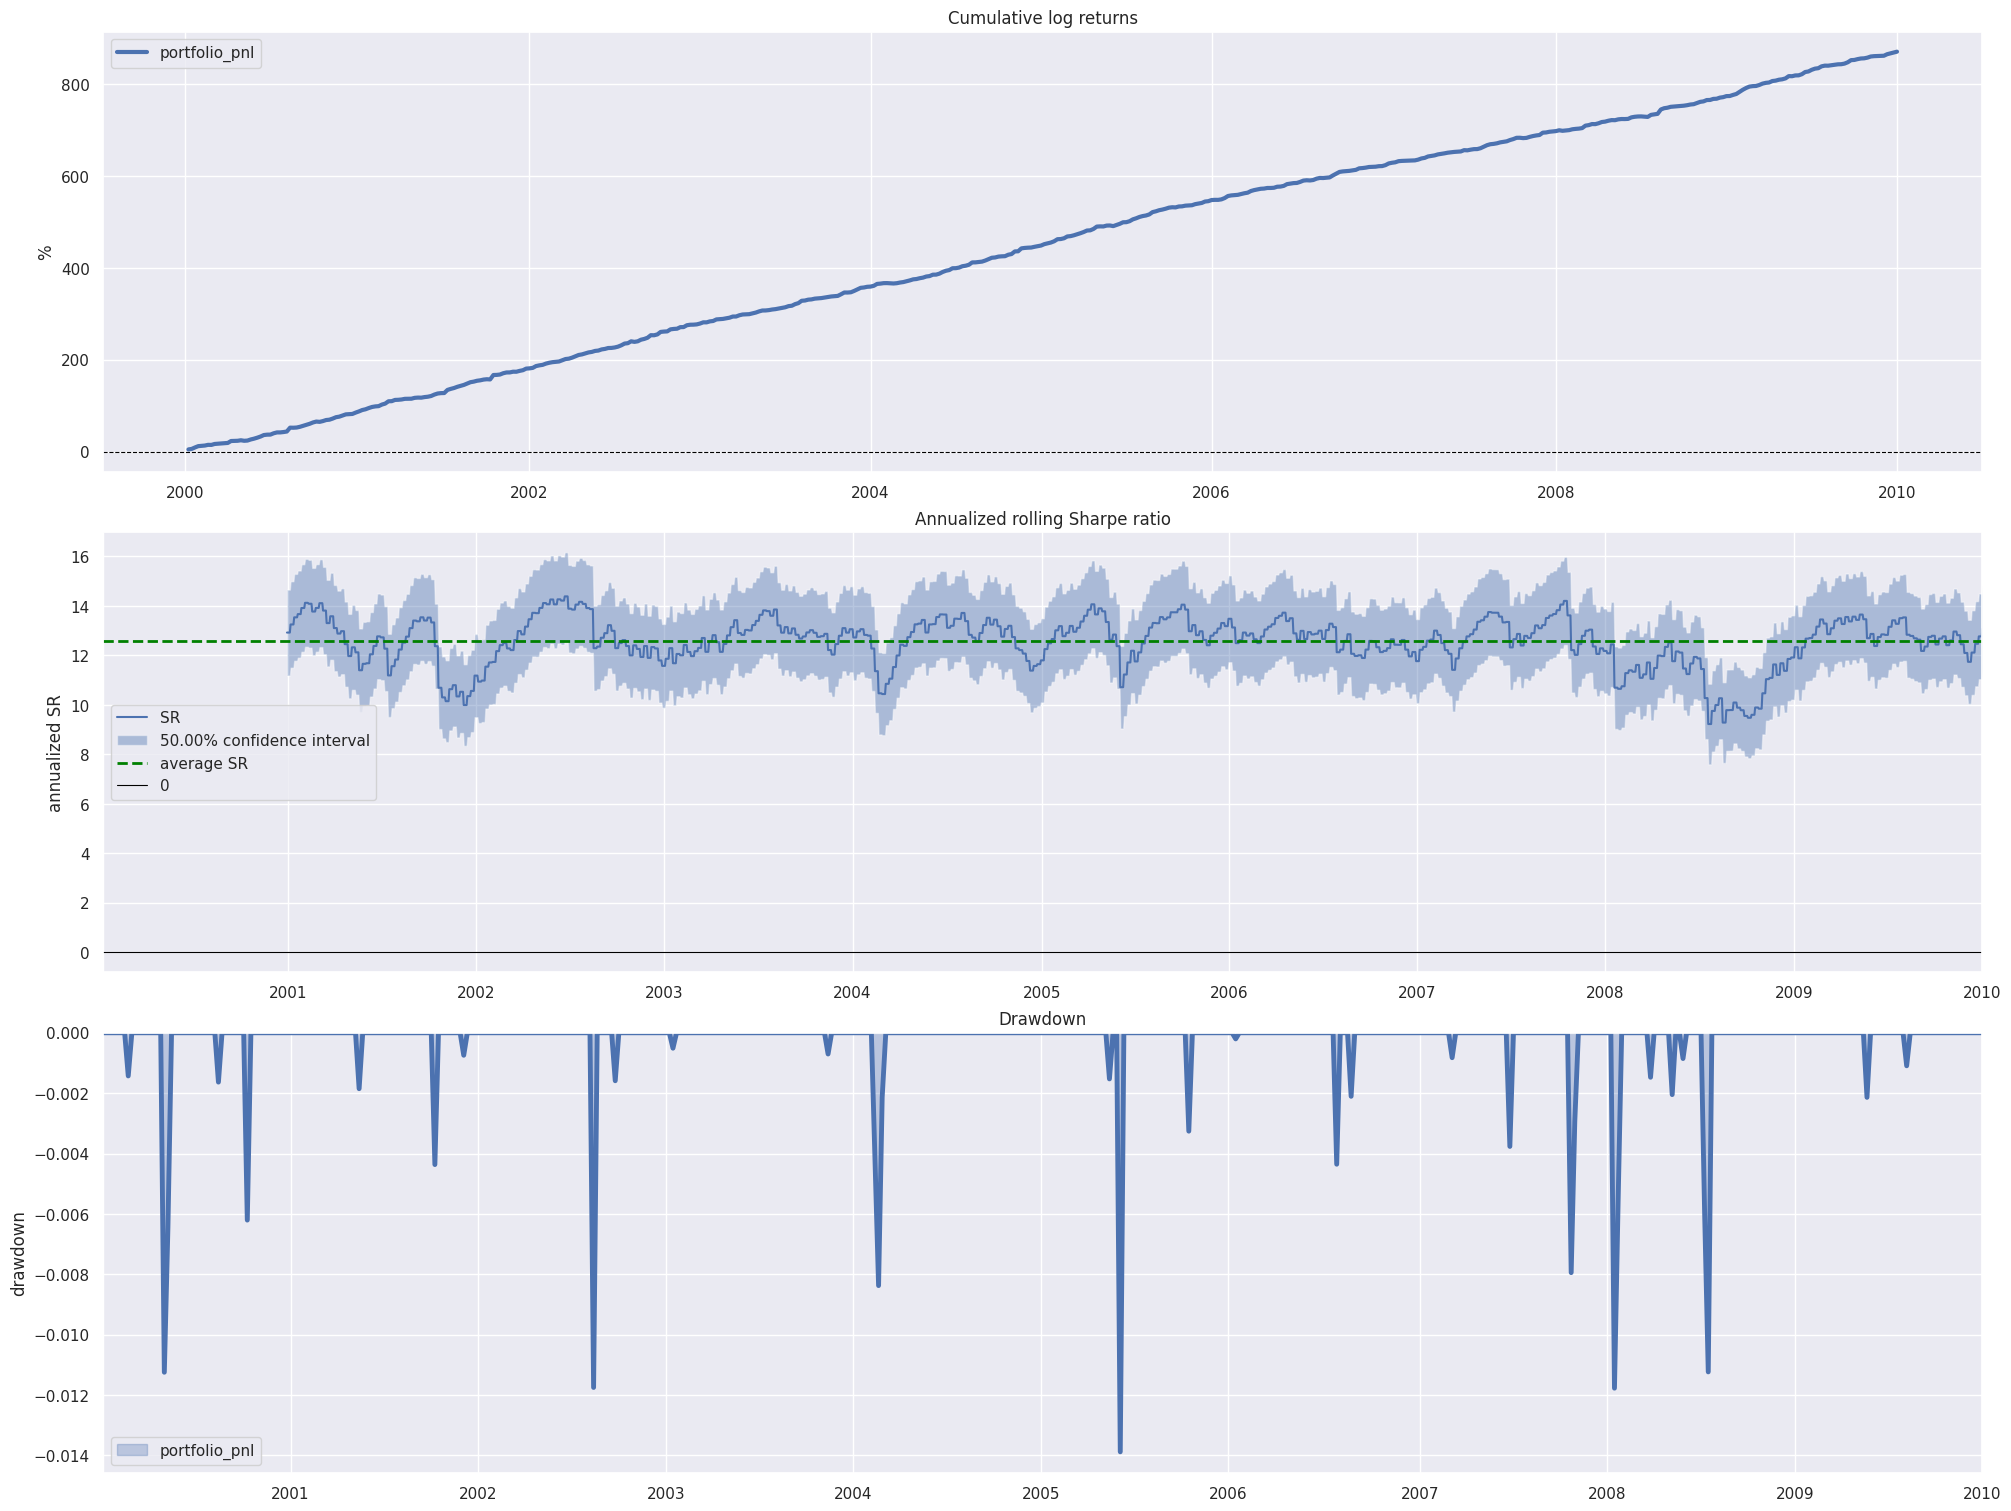

In [11]:
# Set inputs.
evaluator, eval_config = cdmttme.get_example_model_evaluator()
# Build the ModelPlotter.
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

In [12]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_effective_correlation_rank1()

[3.265788197912607, 2.8157251743641987, 1.987696077352457]

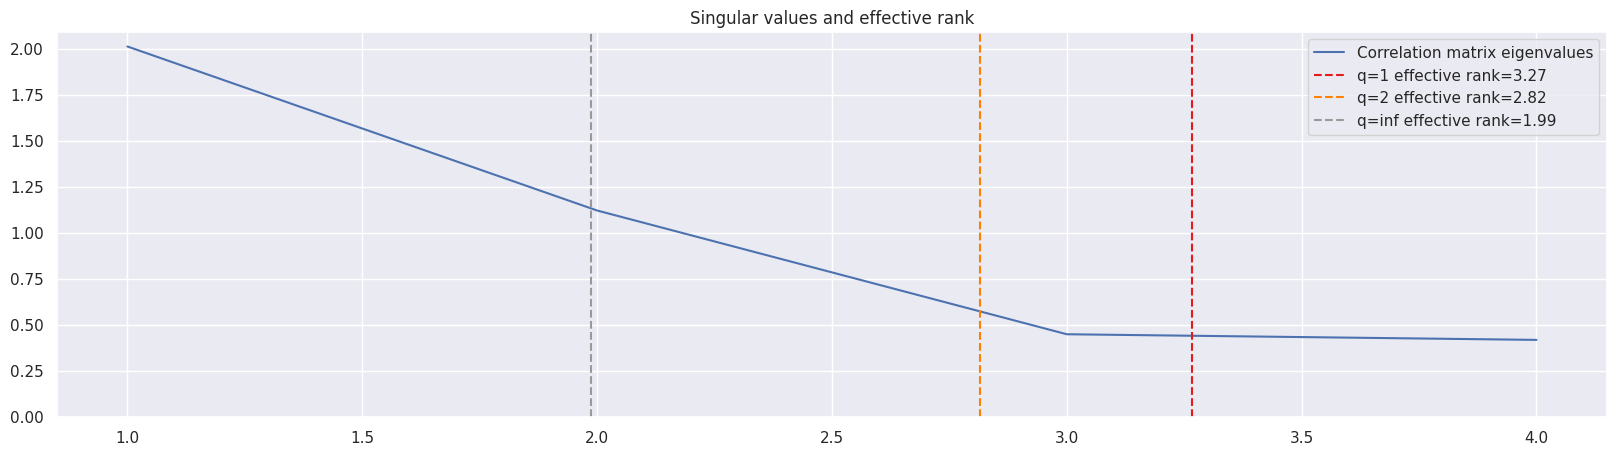

In [13]:
cplocorr.plot_effective_correlation_rank(test_df)

[2.260229143158796,
 2.581730531386776,
 2.2284513439684215,
 2.3325868760320234,
 2.1493150307183515]

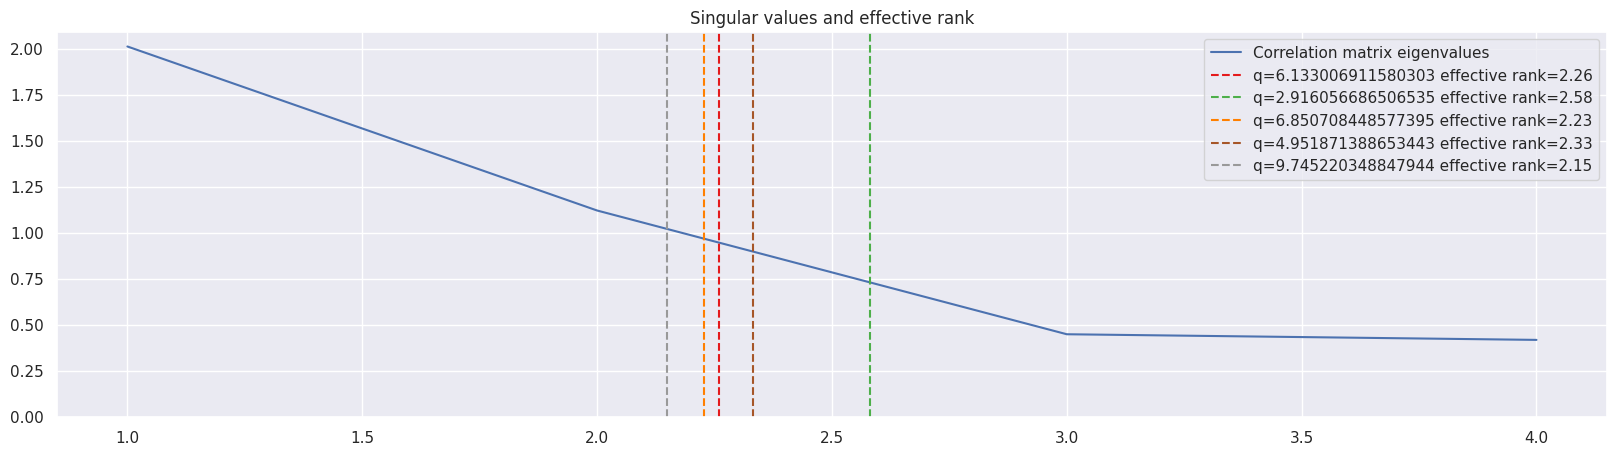

In [14]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [15]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_spectrum1()

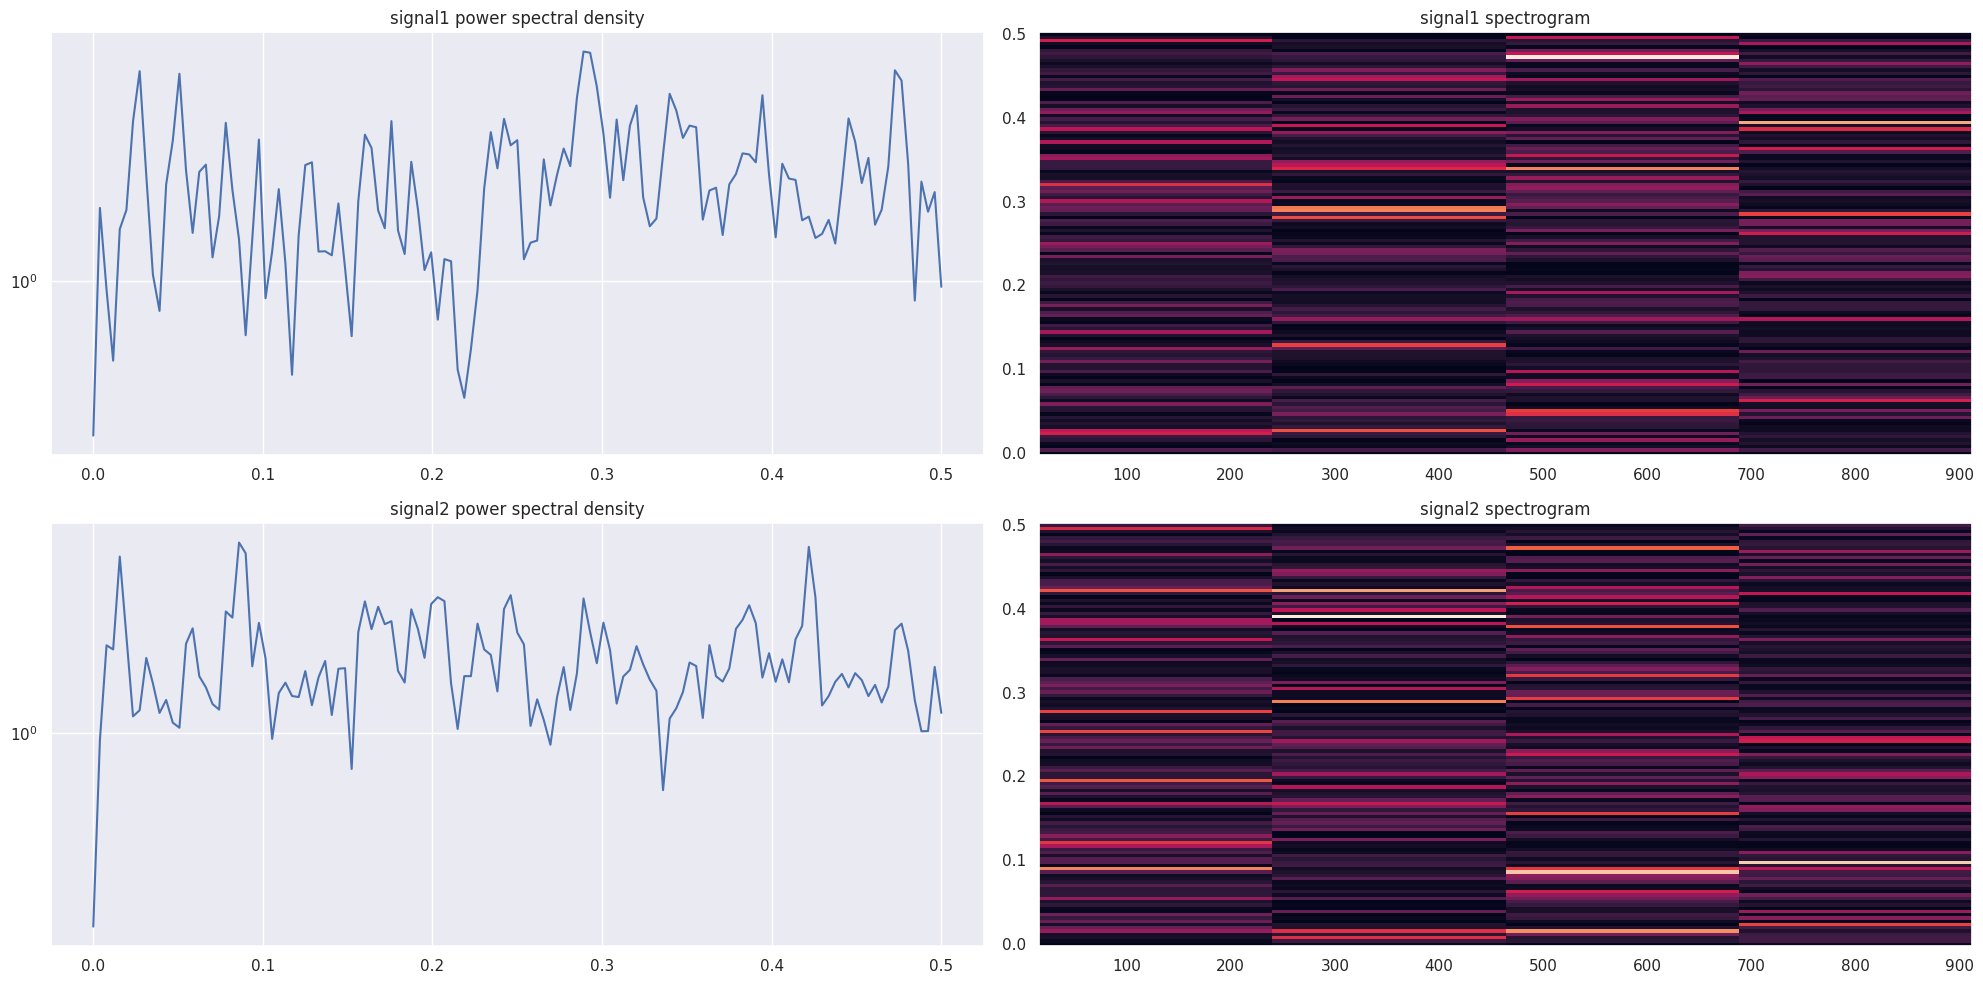

In [16]:
cplmiplo.plot_spectrum(test_df)

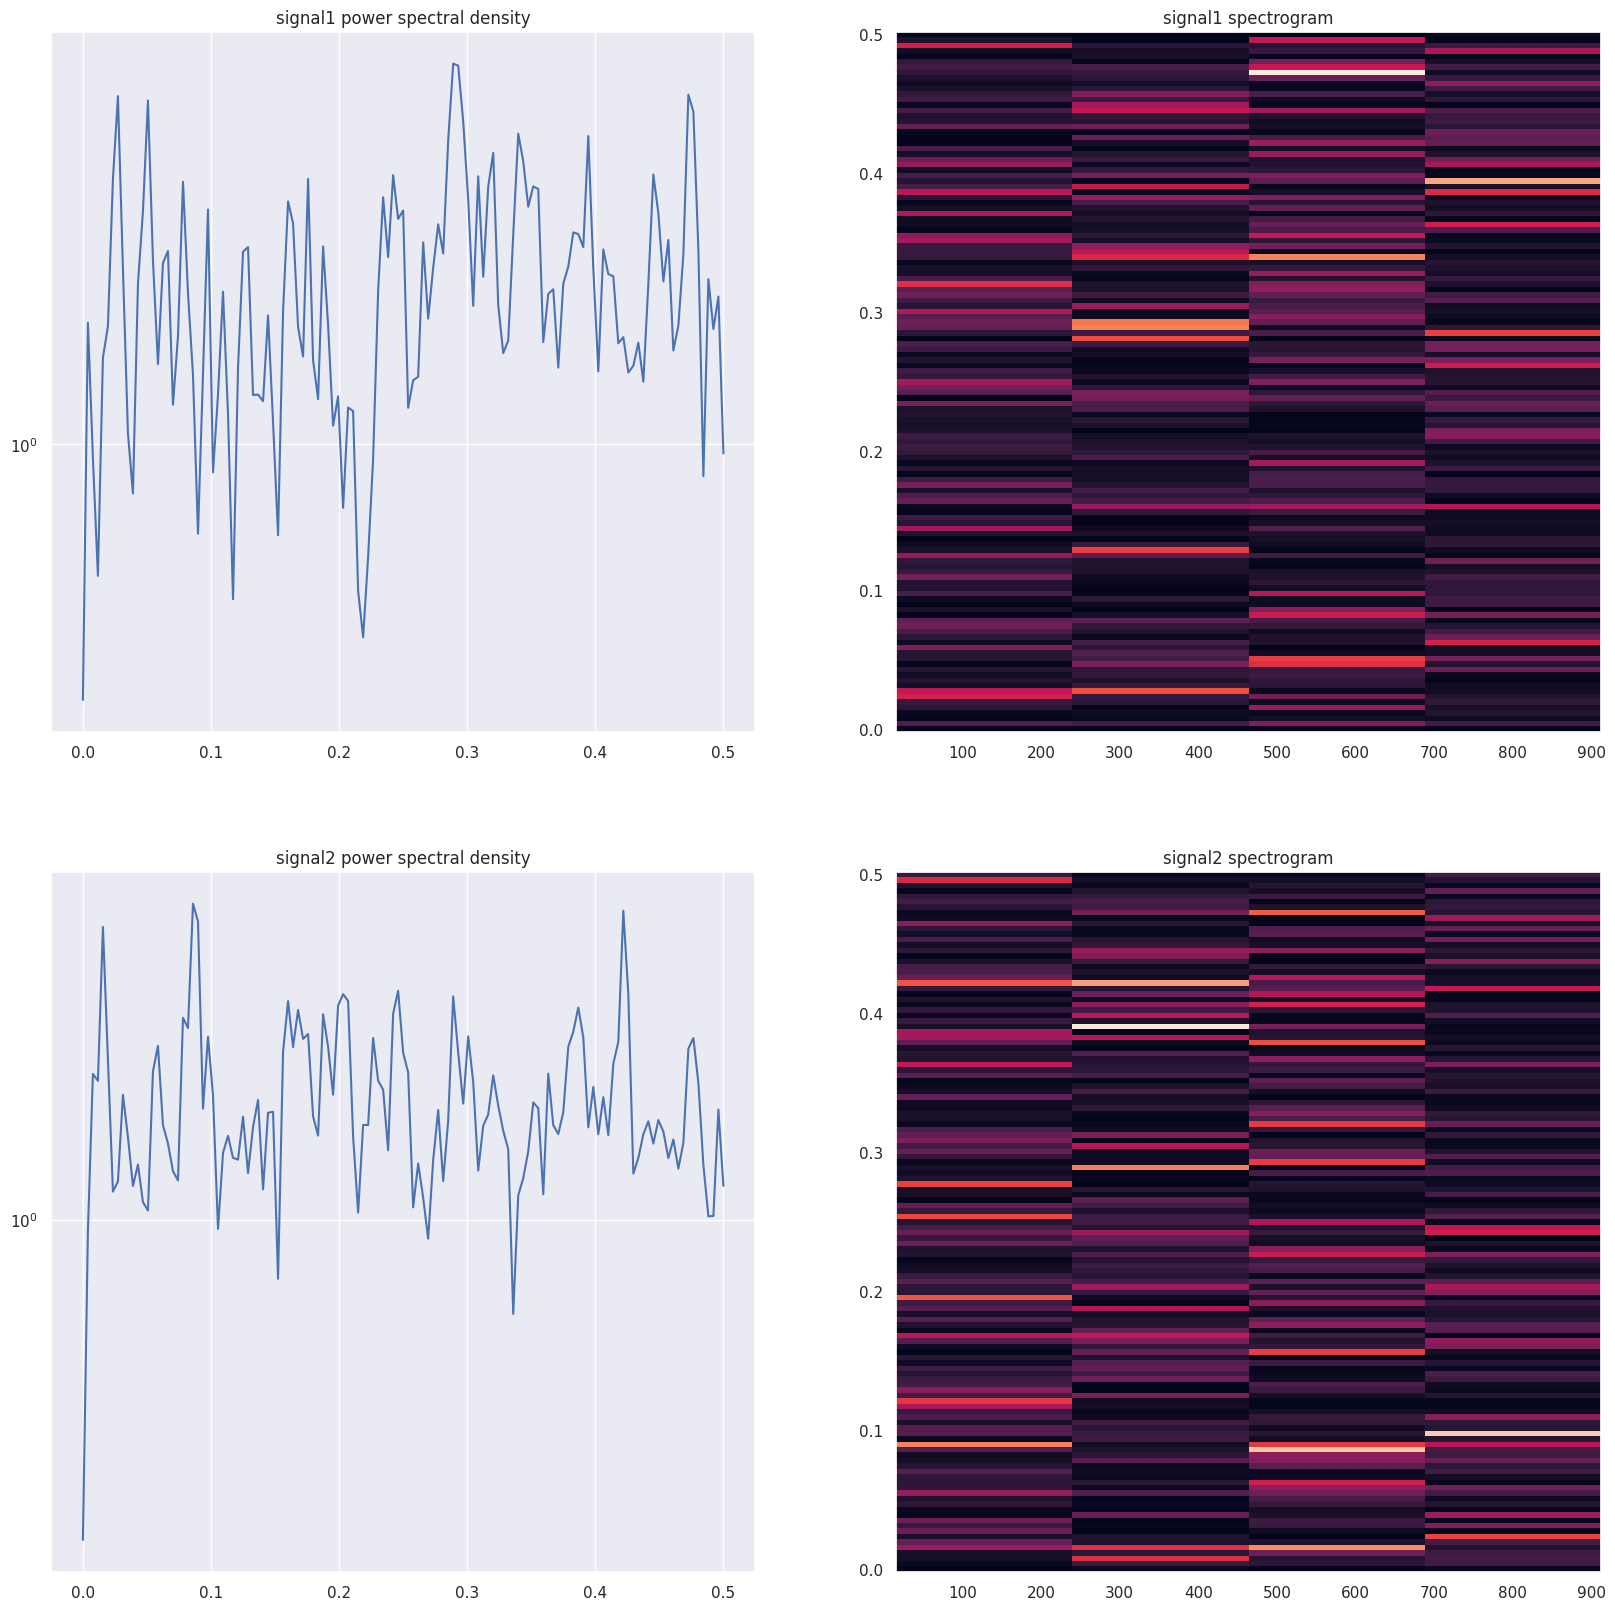

In [17]:
figsize = (20, 20)
_, axes = plt.subplots(2, 2, figsize=figsize)
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

## `plot_qq()`

In [38]:
# Get test data.
norm_data = cptetepl.Test_plots.get_plot_normal_distribution_data()
exp_data = cptetepl.Test_plots.get_plot_exponential_distribution_data()
data_nan = cptetepl.Test_plots.null_out_series_data(norm_data)

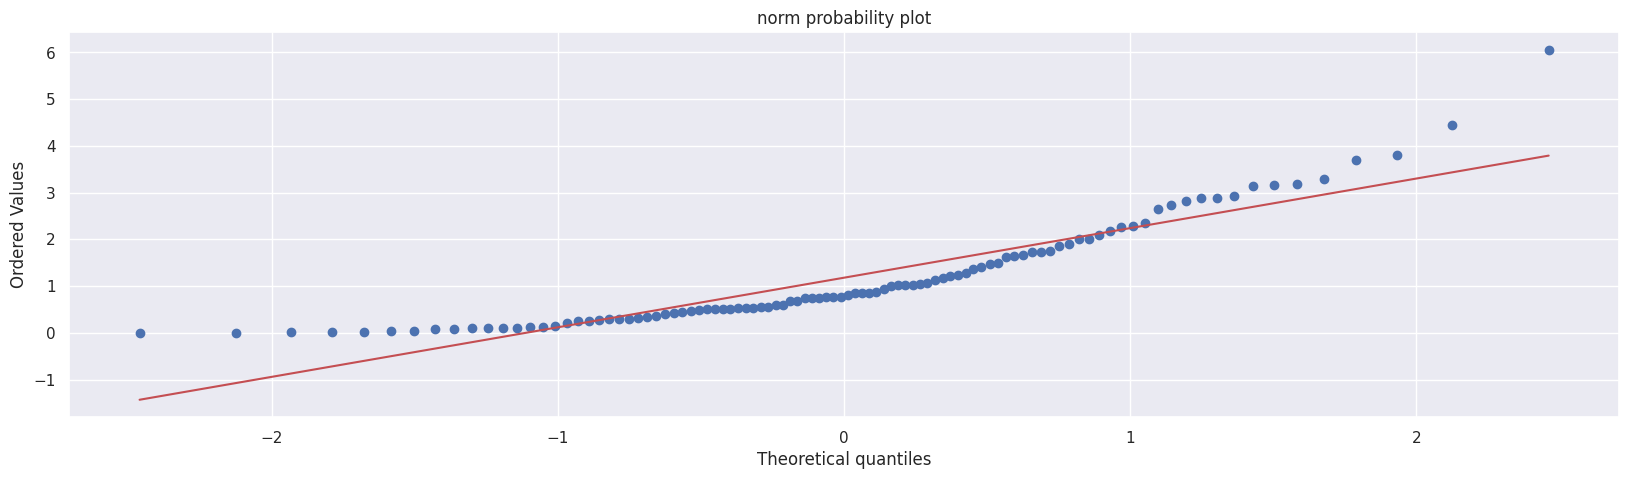

In [30]:
cplonorm.plot_qq(exp_data)

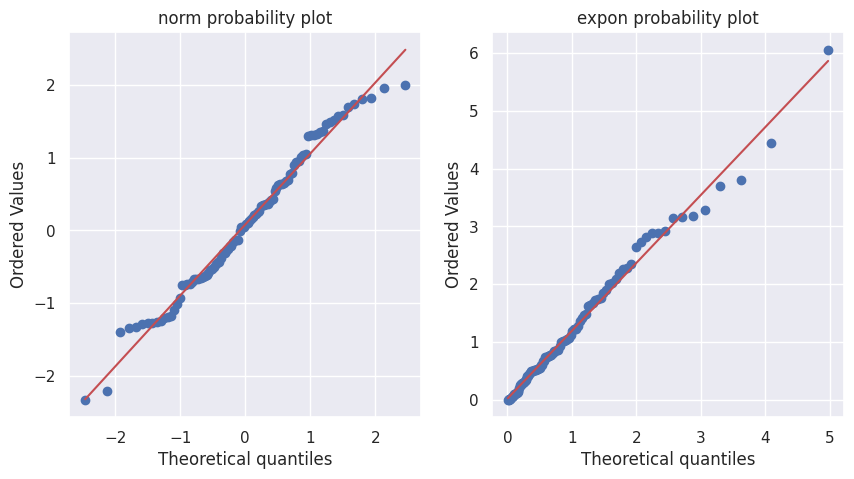

In [32]:
# Data distribution and expected distribution are the same.
figsize = (10, 5)
_, axes = plt.subplots(1, 2, figsize=figsize)
cplonorm.plot_qq(norm_data, ax=axes[0])
cplonorm.plot_qq(exp_data, ax=axes[1], dist='expon')

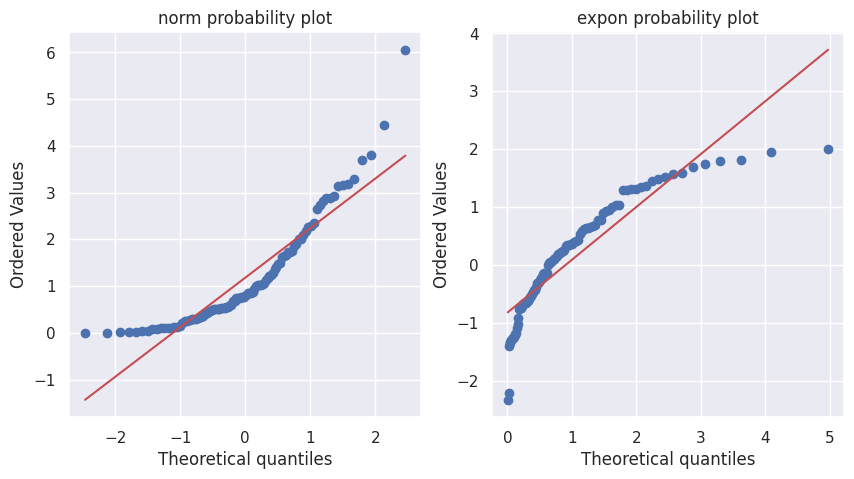

In [33]:
# Data distribution and expected distribution are different.
figsize = (10, 5)
_, axes = plt.subplots(1, 2, figsize=figsize)
cplonorm.plot_qq(exp_data, ax=axes[0])
cplonorm.plot_qq(norm_data, ax=axes[1], dist='expon')

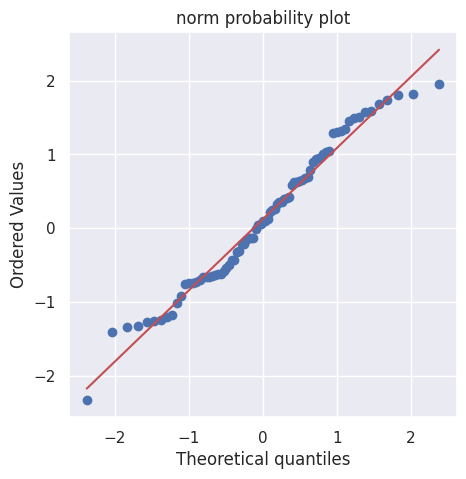

In [40]:
# NaNs present in the input data.
figsize = (5, 5)
_, ax = plt.subplots(1, 1, figsize=figsize)
cplonorm.plot_qq(data_nan, ax=ax)